<a href="https://colab.research.google.com/github/luisdiaz1989/trabajofinal/blob/main/proyectoPeliculas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Carga el archivo CSV
df_movies = pd.read_csv("IMDb_Top_1000.csv")

# Mostrar las primeras filas
df_movies.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [8]:
import sqlite3
import pandas as pd

# Establecer la conexión y crear la tabla
with sqlite3.connect("votaciones.db") as conn:
    cursor = conn.cursor()
    cursor.executescript("""
    DROP TABLE IF EXISTS votaciones;

    CREATE TABLE votaciones (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        usuario_id INTEGER,
        movie_title TEXT,
        calificacion REAL
    );

    INSERT INTO votaciones (usuario_id, movie_title, calificacion) VALUES
    (1, 'The Shawshank Redemption', 9.0),
    (2, 'The Godfather', 8.5),
    (3, 'The Dark Knight', 9.2),
    (1, 'Pulp Fiction', 8.8),
    (2, 'The Godfather: Part II', 8.9);
    """)
    conn.commit()

# Leer los datos de la base de datos
with sqlite3.connect("votaciones.db") as conn:
    df_votes = pd.read_sql("SELECT * FROM votaciones", conn)

print(df_votes.head())



   id  usuario_id               movie_title  calificacion
0   1           1  The Shawshank Redemption           9.0
1   2           2             The Godfather           8.5
2   3           3           The Dark Knight           9.2
3   4           1              Pulp Fiction           8.8
4   5           2    The Godfather: Part II           8.9


In [9]:
# Leer los datos desde la base de datos en un DataFrame
import pandas as pd

df_votes = pd.read_sql("SELECT * FROM votaciones", conn)
df_votes.head()


,id,usuario_id,movie_title,calificacion
0,1,1,The Shawshank Redemption,9.0
1,2,2,The Godfather,8.5
2,3,3,The Dark Knight,9.2
3,4,1,Pulp Fiction,8.8
4,5,2,The Godfather: Part II,8.9


In [10]:
from google.colab import files

# Descarga votaciones.db al equipo local
files.download("votaciones.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
df_movies['Title'] = df_movies['Title'].str.strip()
df_votes['movie_title'] = df_votes['movie_title'].str.strip()



In [12]:
df_merged = pd.merge(df_votes, df_movies, left_on='movie_title', right_on='Title')
df_merged.head()

,id,usuario_id,movie_title,calificacion,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,3,3,The Dark Knight,9.2,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


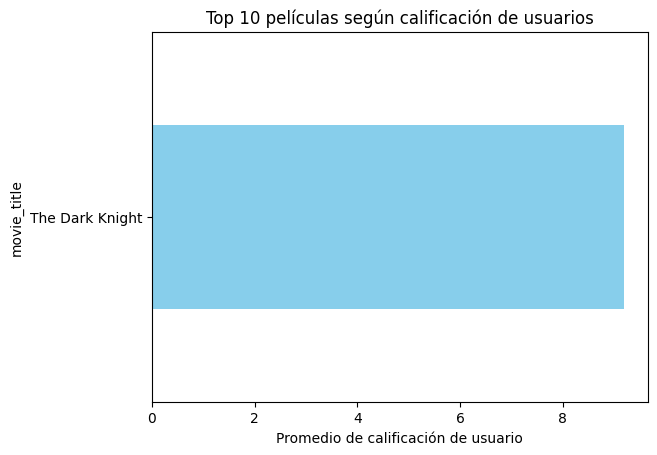

In [13]:
import matplotlib.pyplot as plt

top_10 = df_merged.groupby('movie_title')['calificacion'].mean().sort_values(ascending=False).head(10)
top_10.plot(kind='barh', color='skyblue')
plt.xlabel('Promedio de calificación de usuario')
plt.title('Top 10 películas según calificación de usuarios')
plt.gca().invert_yaxis()
plt.show()

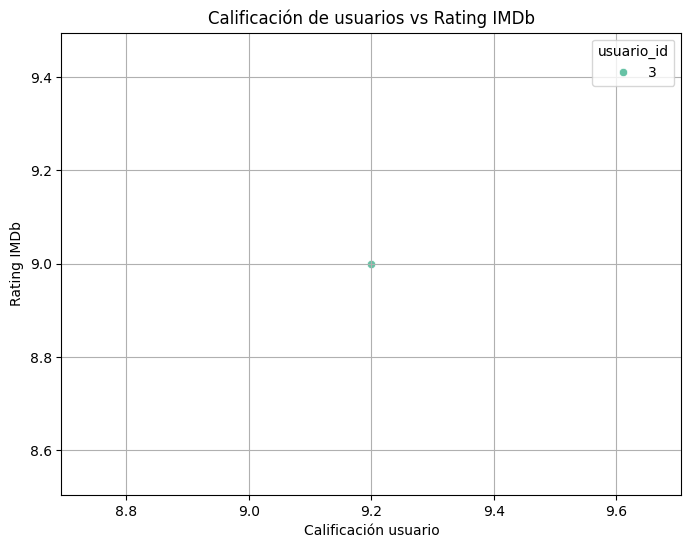

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_merged, x='calificacion', y='Rating', hue='usuario_id', palette='Set2')
plt.title('Calificación de usuarios vs Rating IMDb')
plt.xlabel('Calificación usuario')
plt.ylabel('Rating IMDb')
plt.grid(True)
plt.show()


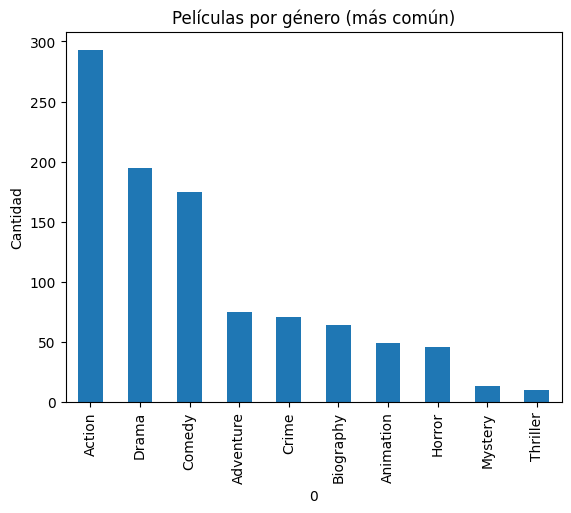

In [15]:
df_movies['Genre'] = df_movies['Genre'].astype(str)
generos = df_movies['Genre'].str.split(',', expand=True)[0]  # solo el primer género
generos.value_counts().head(10).plot(kind='bar', title='Películas por género (más común)')
plt.ylabel('Cantidad')
plt.show()


In [16]:
# Guardar dataset combinado
df_merged.to_csv("dataset_final.csv", index=False)

# Descargar archivo CSV
from google.colab import files
files.download("dataset_final.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
files.download("votaciones.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>